In [47]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [48]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

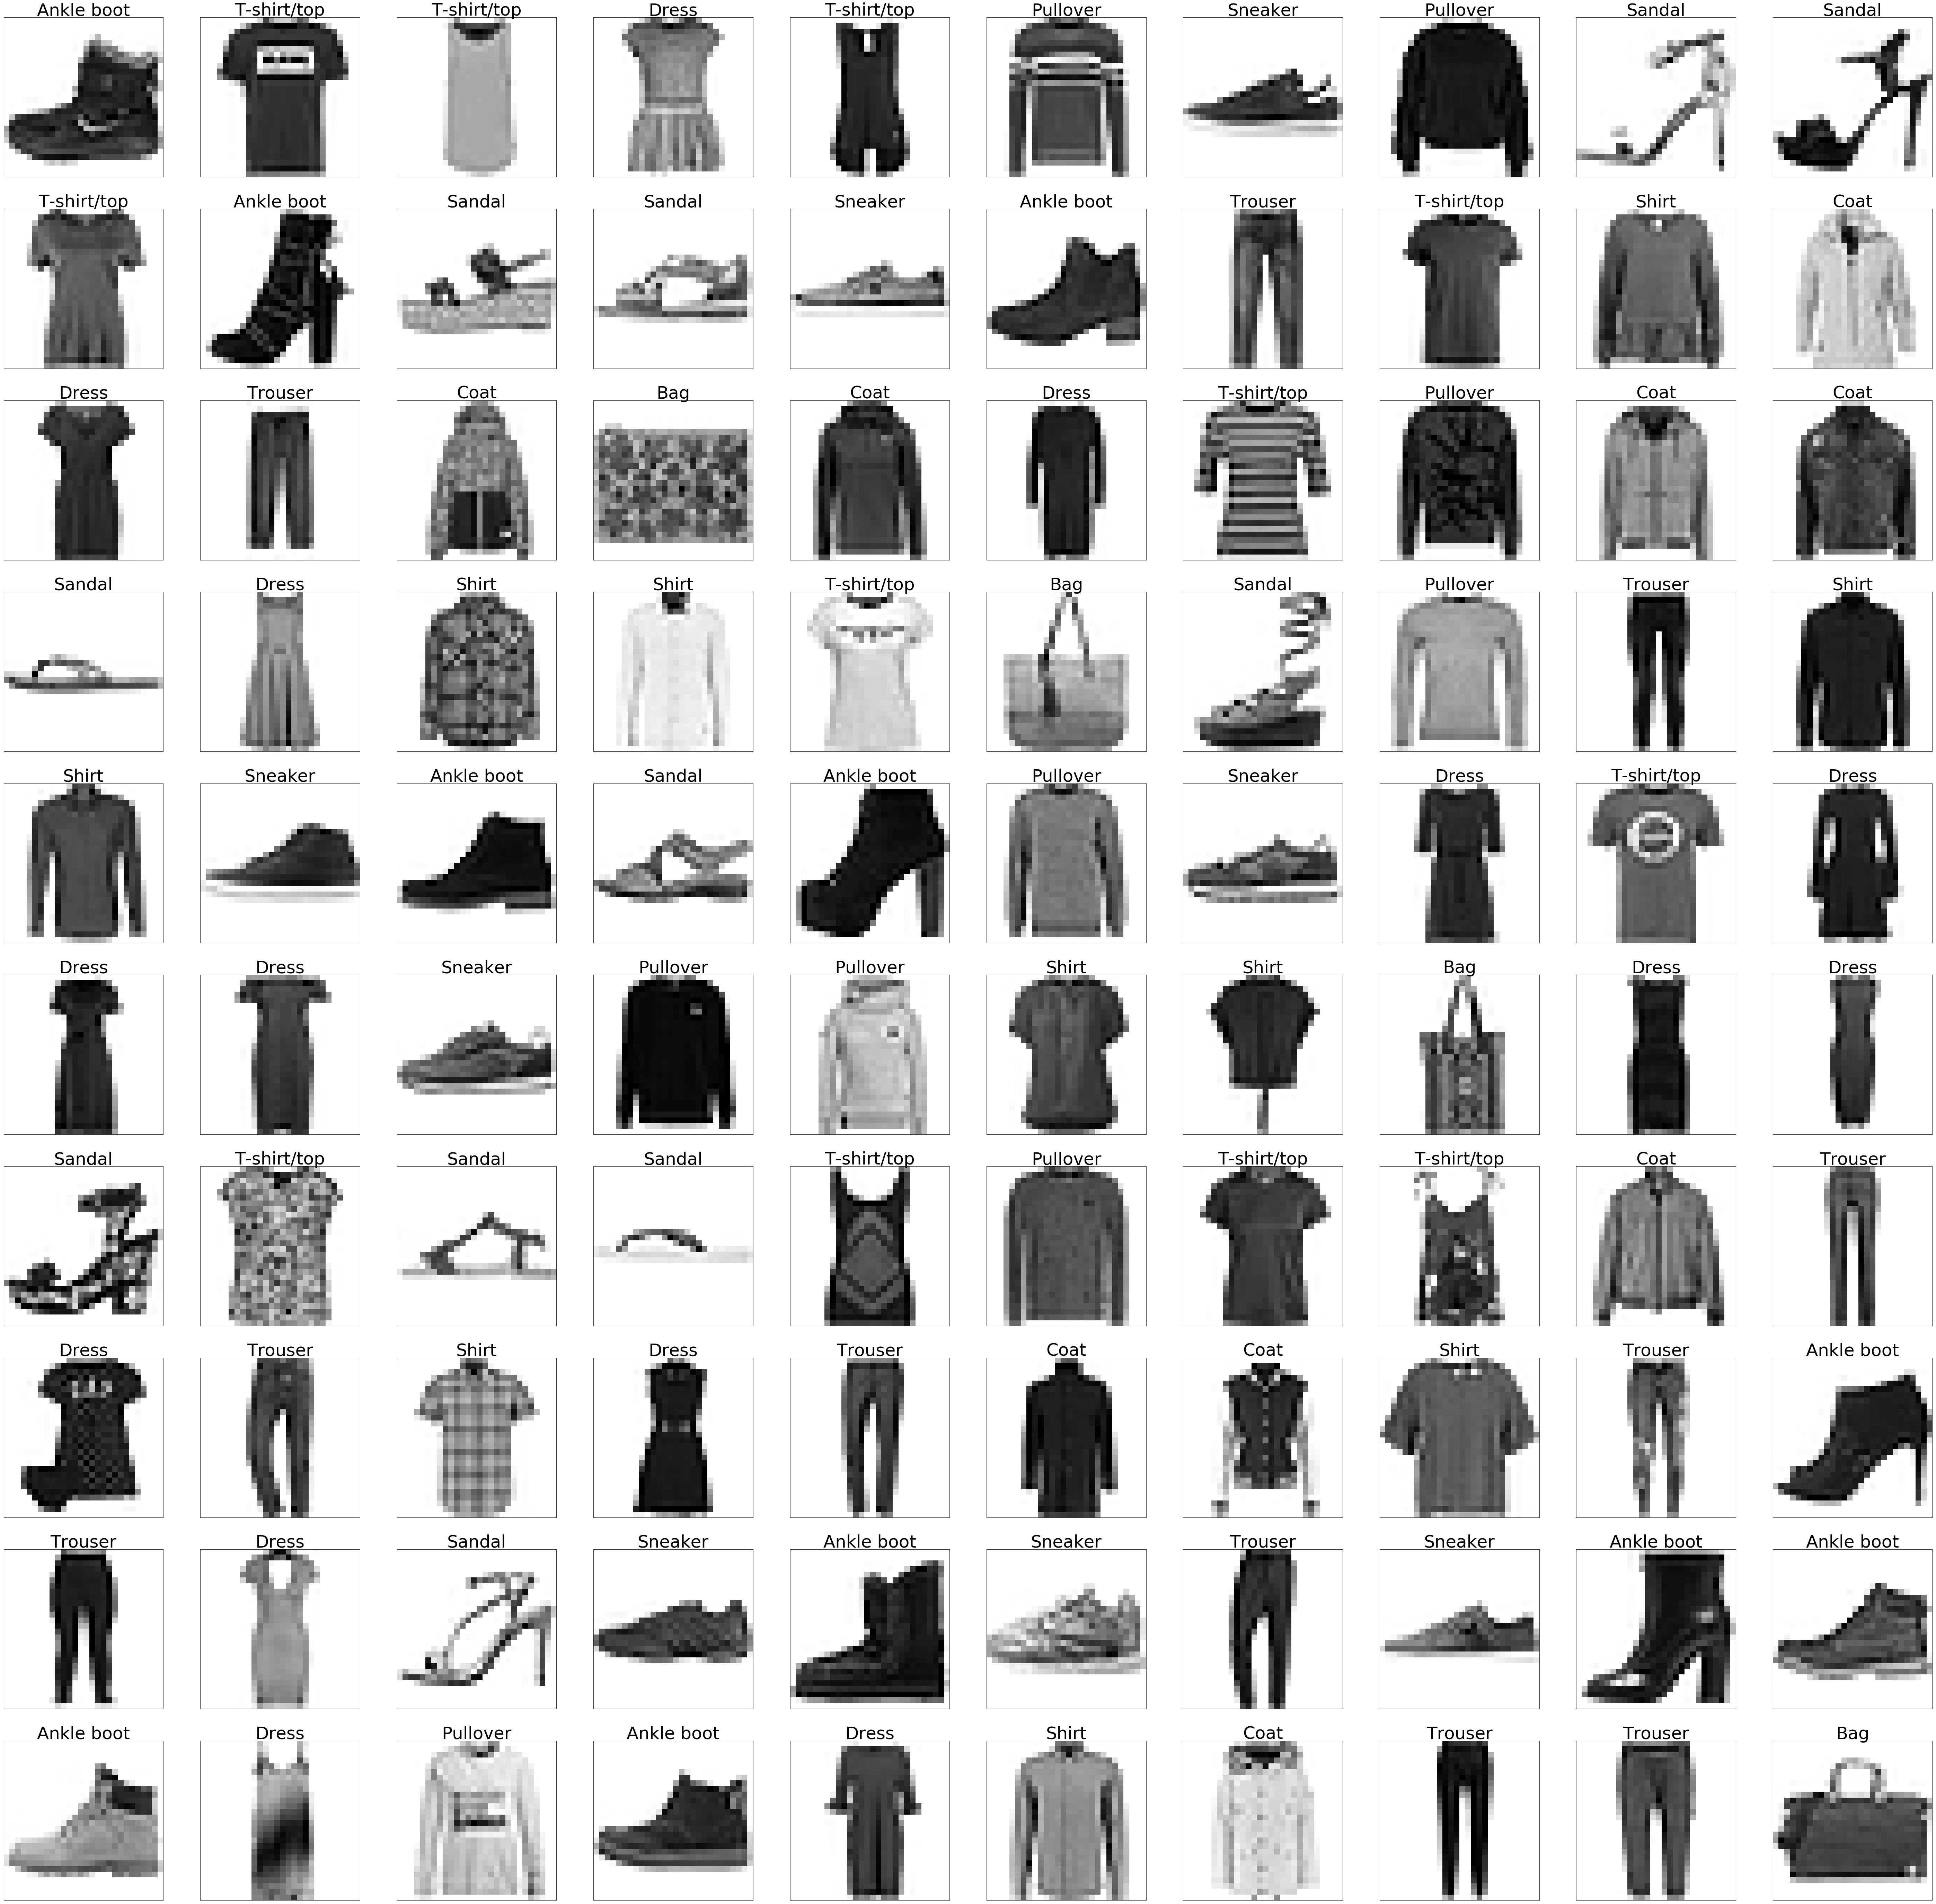

In [49]:
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(100, 100))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(fashion_mnist[y_train[i]], fontsize=50)
plt.show()

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
print(x_train.shape[1:])
print(x_train[1,1])
print(x_train[1:])

(28, 28)
[0.         0.         0.         0.00392157 0.         0.
 0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
 0.9254902  1.         1.         1.         1.         0.85098039
 0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
 0.         0.         0.         0.        ]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0.

In [52]:
img_rows, img_cols = x_train.shape[1:]

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [54]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [55]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [56]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 6s 156us/sample - loss: 0.5205 - acc: 0.8187 - val_loss: 0.4240 - val_acc: 0.8495
Epoch 2/10
40199/40199 [==============================] - 6s 161us/sample - loss: 0.3880 - acc: 0.8607 - val_loss: 0.3734 - val_acc: 0.8646
Epoch 3/10
40199/40199 [==============================] - 6s 155us/sample - loss: 0.3495 - acc: 0.8726 - val_loss: 0.3591 - val_acc: 0.8716
Epoch 4/10
40199/40199 [==============================] - 7s 164us/sample - loss: 0.3160 - acc: 0.8839 - val_loss: 0.3283 - val_acc: 0.8805
Epoch 5/10
40199/40199 [==============================] - 8s 190us/sample - loss: 0.2953 - acc: 0.8898 - val_loss: 0.3310 - val_acc: 0.8804
Epoch 6/10
40199/40199 [==============================] - 6s 153us/sample - loss: 0.2797 - acc: 0.8960 - val_loss: 0.3268 - val_acc: 0.8839
Epoch 7/10
40199/40199 [==============================] - 7s 179us/sample - loss: 0.2626 - acc: 0.9041 - val_l

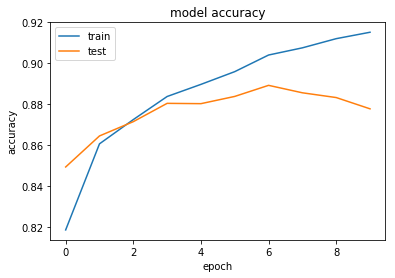

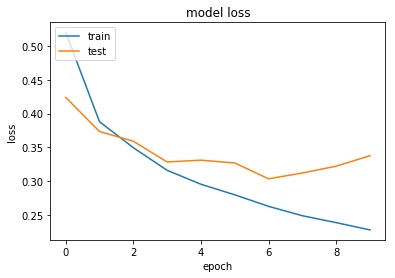

In [57]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


Bag


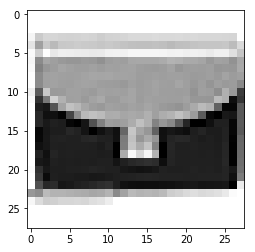

In [70]:
# 28 * 28, no flatten directly!
# Batch part, make it flexible (1 * 28 * 28)


testID = 78
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(x_test[testID], cmap=plt.cm.binary)
out = model.predict(x_test[testID].reshape(1,img_rows, img_cols)) ## inferrence
print(fashion_mnist[np.argmax(out)])

In [71]:
out

array([[1.7305811e-07, 4.8063008e-12, 1.7131088e-08, 7.3540181e-13,
        1.7956264e-09, 1.9542704e-06, 1.7883163e-08, 4.9832845e-08,
        9.9999702e-01, 7.1646230e-07]], dtype=float32)

In [35]:
np.sum(out)

1.0

In [72]:
model.save_weights('fashion_mnist_weights.h5')
model.load_weights('fashion_mnist_weights.h5')

Pullover


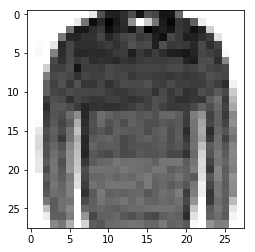

In [73]:
# 28 * 28, no flatten directly!
# Batch part, make it flexible (1 * 28 * 28)


testID2 = 20
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(x_test[testID2], cmap=plt.cm.binary)
out2 = model.predict(x_test[testID2].reshape(1,img_rows, img_cols)) ## inferrence
print(fashion_mnist[np.argmax(out2)])

In [74]:
out2

array([[4.0039543e-02, 6.0834143e-05, 9.5767087e-01, 4.8397567e-07,
        1.7876228e-03, 2.3464164e-09, 4.1264968e-04, 1.3030525e-07,
        2.4708641e-05, 3.1183351e-06]], dtype=float32)